<a href="https://colab.research.google.com/github/Najwaalya/MachineLearning_2025/blob/main/ML_JS4_Modul1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [67]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Membuat Data Dummy (Linear Separable)

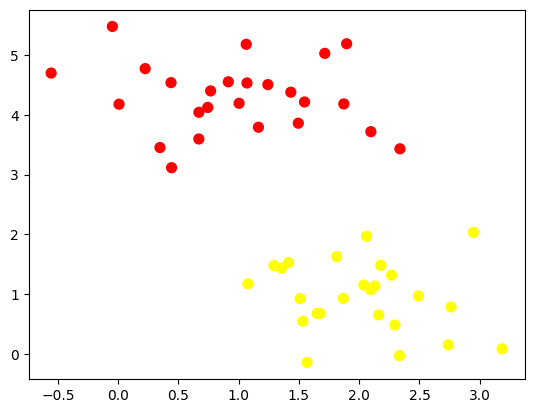

In [68]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

## Garis Pemisah Awal (Beberapa Alternatif)

(-1.0, 3.5)

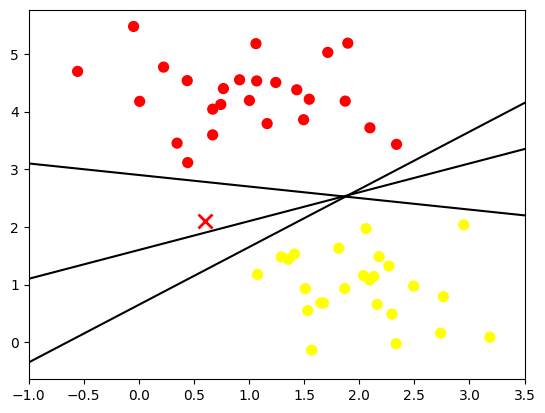

In [69]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1.0, 3.5)

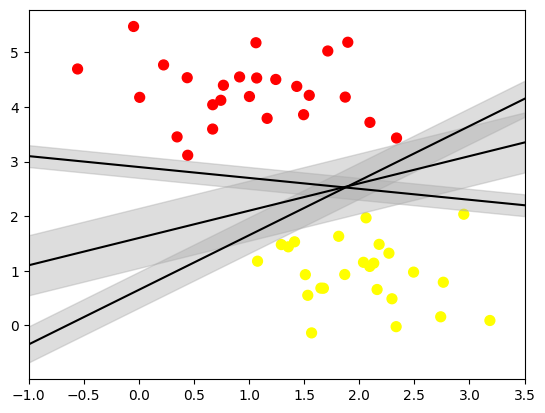

In [70]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

## Penerappan fitting SVM

In [71]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [72]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

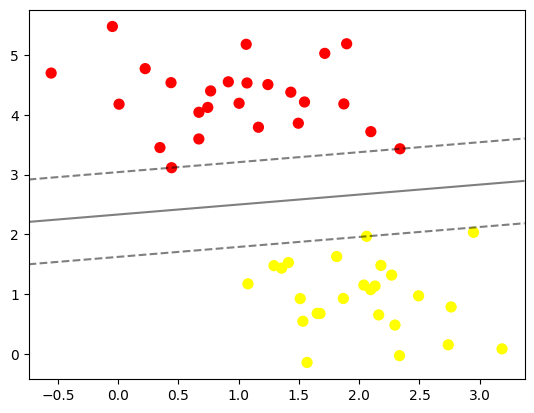

In [73]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [74]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

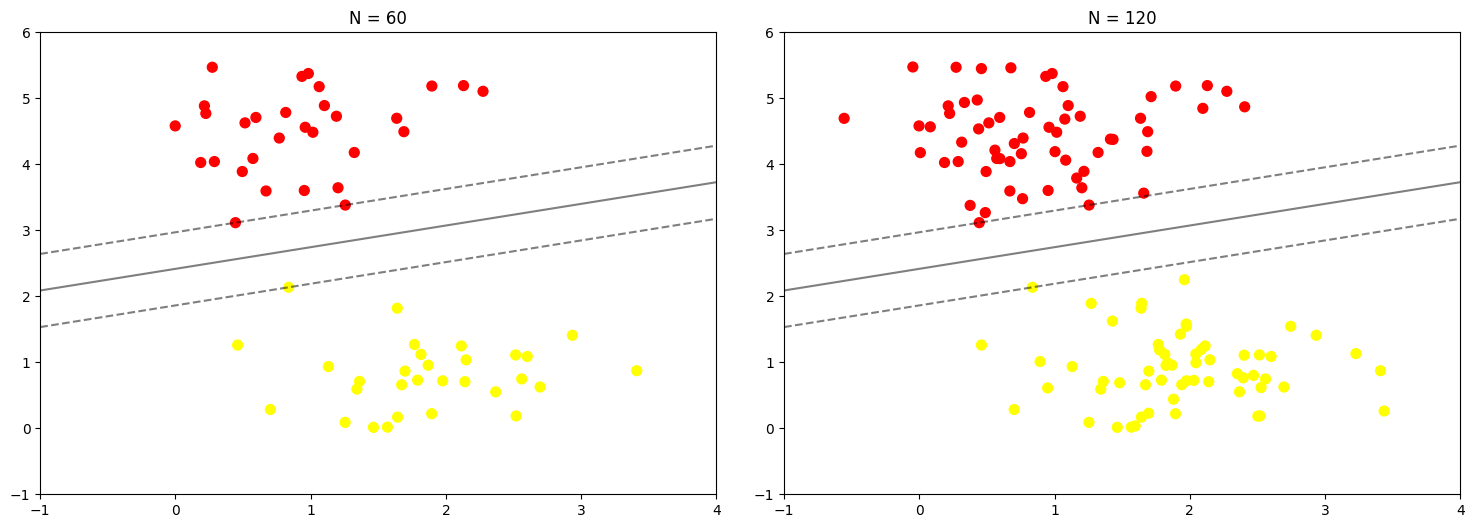

In [75]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

## Data Tidak Terpisah Secara Linier

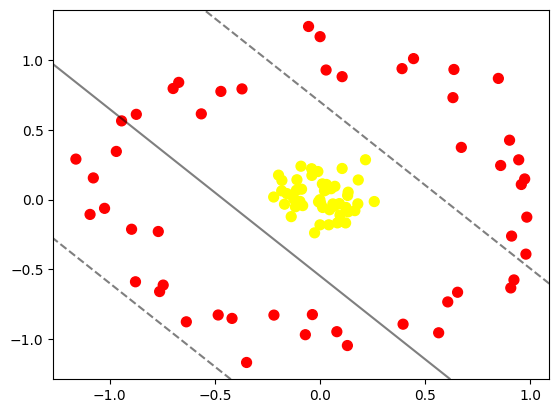

In [76]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [77]:
r = np.exp(-(X ** 2).sum(1))

In [78]:
pip install ipywidgets

In [79]:
from ipywidgets import interact, fixed

In [80]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 1.23323738e-01, -5.58062241e-02],
       [-1.28765415e-01,  2.34465083e-02],
       [ 3.90427755e-01,  9.39698257e-01],
       [ 2.91063972e-02,  9.29735135e-01],
       [ 9.22561268e-01, -5.75782777e-01],
       [-1.57221625e-01,  4.32711619e-02],
       [ 6.07771204e-01, -7.33514542e-01],
       [-7.62615282e-01, -6.59162682e-01],
       [ 2.14199294e-02,  6.36078173e-02],
       [-3.85028837e-02,  1.73871456e-01],
       [-1.02450693e+00, -6.24515285e-02],
       [ 9.07541258e-01, -6.33217057e-01],
       [ 5.64529122e-01, -9.54932359e-01],
       [-9.53770903e-02, -1.23111560e-02],
       [-3.70821221e-01,  7.94293610e-01],
       [ 9.01740326e-01,  4.26409935e-01],
       [ 6.13803513e-02, -3.07240885e-02],
       [-1.16788562e-01, -5.12026211e-02],
       [-1.16084996e+00,  2.90787960e-01],
       [ 6.32451473e-01,  7.31646188e-01],
       [-6.95160080e-02, -9.68662089e-01],
       [-8.73471034e-01,  6.11801911e-01],
       [ 9.06605160e-02, -1.59323265e-01],
       [-9.03389562e-02,  2.39784759e-01],
       [-7.69026166e-01, -2.28515125e-01],
       [-9.43478149e-01,  5.64877000e-01],
       [-2.18968625e-01, -8.28144459e-01],
       [ 1.66023251e-01, -7.88849330e-02],
       [ 8.02705717e-02, -9.47064765e-01],
       [-8.75421016e-02,  7.48461053e-02],
       [ 1.05393502e-01,  8.82079743e-01],
       [ 3.06752414e-02,  1.08954345e-01],
       [ 7.18772778e-05, -1.80673556e-01],
       [-2.20195008e-01,  1.88832438e-02],
       [ 1.34030116e-01,  5.35517583e-02],
       [-9.99948941e-03,  2.01752134e-01],
       [-1.81976751e-01,  6.30796096e-02],
       [ 9.57587975e-01,  1.08714530e-01],
       [-6.98407551e-01,  7.97114836e-01],
       [-1.36789255e-01, -1.21935875e-01],
       [ 1.13726723e-02,  1.12999867e-01],
       [-4.18279951e-01, -8.51833223e-01],
       [-6.71811105e-01,  8.40981468e-01],
       [-7.45653166e-01, -6.12820940e-01],
       [-1.09351890e+00, -1.06016964e-01],
       [ 1.21943882e-01, -1.67025168e-01],
       [-9.68564738e-01,  3.45772659e-01],
       [ 9.24066682e-02, -2.81703977e-02],
       [-6.87012310e-03, -1.51938377e-02],
       [ 9.83729130e-01, -1.25512114e-01],
       [-8.77407016e-01, -5.89183683e-01],
       [ 3.95247457e-01, -8.93294567e-01],
       [ 6.75743000e-02, -4.73758629e-02],
       [ 9.73640901e-01,  1.48444069e-01],
       [ 1.30413338e-01, -1.04644033e+00],
       [-3.61332238e-02, -8.24424580e-01],
       [-4.71205609e-01,  7.76260924e-01],
       [-1.23480646e-01,  3.13070968e-03],
       [-1.07797053e+00,  1.55777641e-01],
       [ 9.45280337e-01,  2.85679118e-01],
       [-1.68622294e-01, -3.27567580e-02],
       [ 1.82111679e-01,  1.41245320e-01],
       [ 8.26581288e-02, -1.66629054e-01],
       [-3.97744431e-02,  2.21741777e-01],
       [-8.95960675e-01, -2.12363844e-01],
       [ 2.16559261e-01,  2.86149930e-01],
       [ 7.09606072e-02,  9.56138075e-02],
       [ 9.79563574e-01, -3.90856920e-01],
       [-5.42356706e-02,  1.24200143e+00],
       [-6.35617849e-01, -8.76255484e-01],
       [-1.12063805e-01,  6.73513651e-02],
       [ 1.33837967e-01, -8.73859995e-02],
       [-8.22495184e-02, -4.27393586e-02],
       [ 2.58219147e-01, -1.36379277e-02],
       [ 3.37834820e-02,  7.48872887e-02],
       [ 8.48494991e-01,  8.69456856e-01],
       [ 5.84371703e-04,  1.16894073e+00],
       [ 5.32899938e-02,  7.84211992e-02],
       [-1.81090898e-01,  1.37746773e-01],
       [-3.13431551e-04, -7.24543227e-04],
       [-4.84042424e-01, -8.27342966e-01],
       [ 8.59415187e-01,  2.44989425e-01],
       [ 9.11394657e-01, -2.61393737e-01],
       [ 4.45006792e-01,  1.01158280e+00],
       [ 4.20539909e-02, -1.80620512e-01],
       [-1.09577564e-01,  1.42671465e-01],
       [-1.97052082e-01,  1.75671626e-01],
       [ 1.05435710e-01,  2.23535308e-01],
       [ 6.37144265e-01,  9.33616034e-01],
       [-2.56039927e-02, -2.38140047e-01],
       [ 9.52188304e-02, -1.10754002e-01],
       [ 1.31612454e-01,  3.00505293e-02

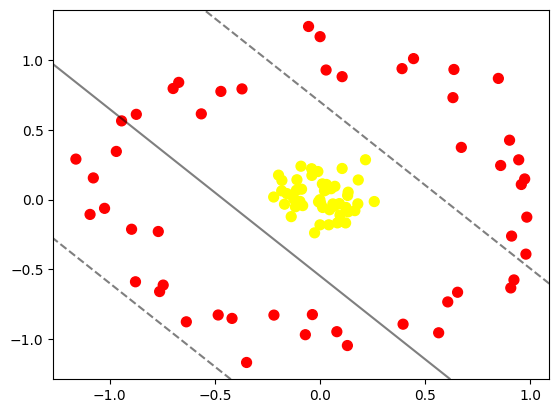

In [81]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

## Data Overlap

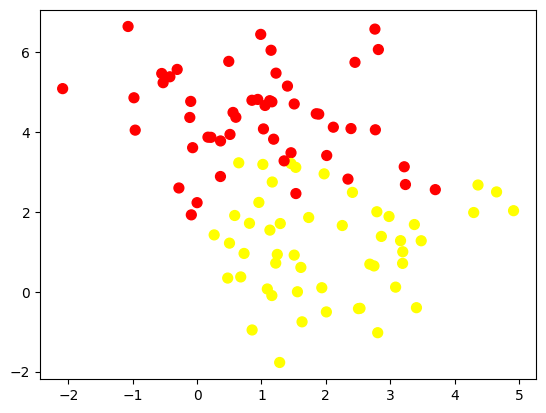

In [82]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

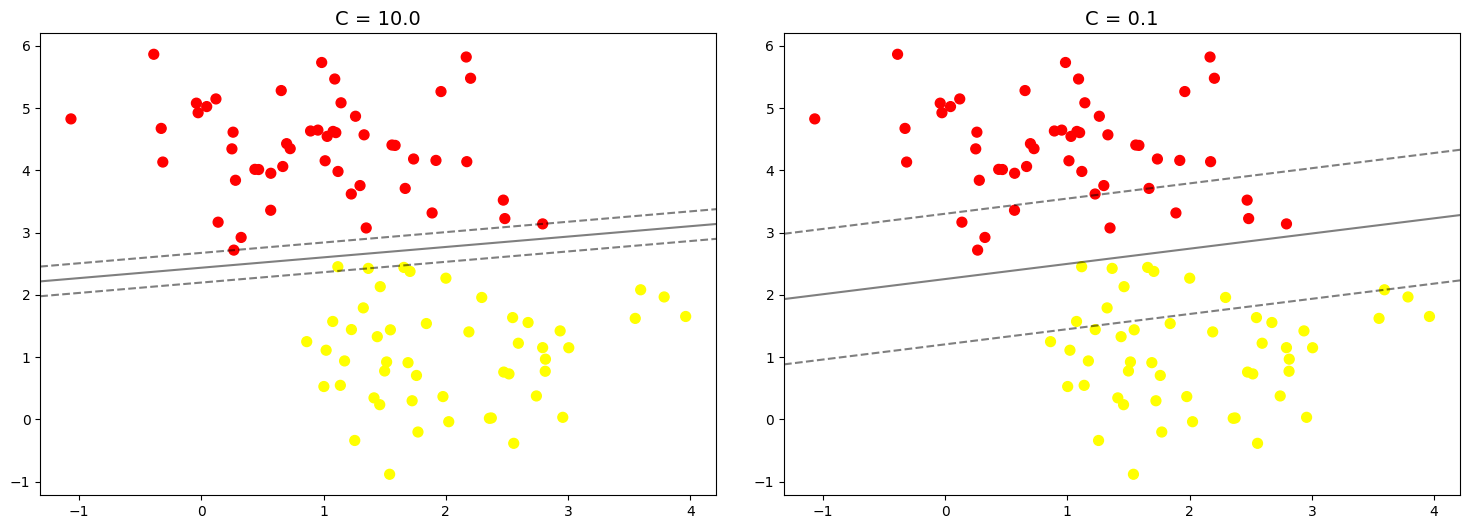

In [83]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)